In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = pd.read_csv("Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.drop("Id",axis=1,inplace=True)

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


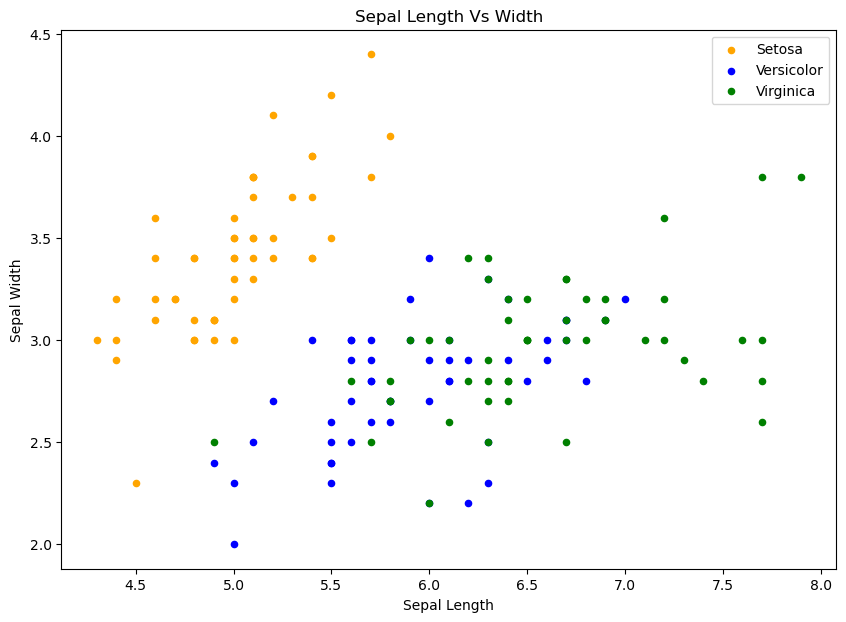

In [8]:
fig=iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='Versicolor',ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='Virginica',ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

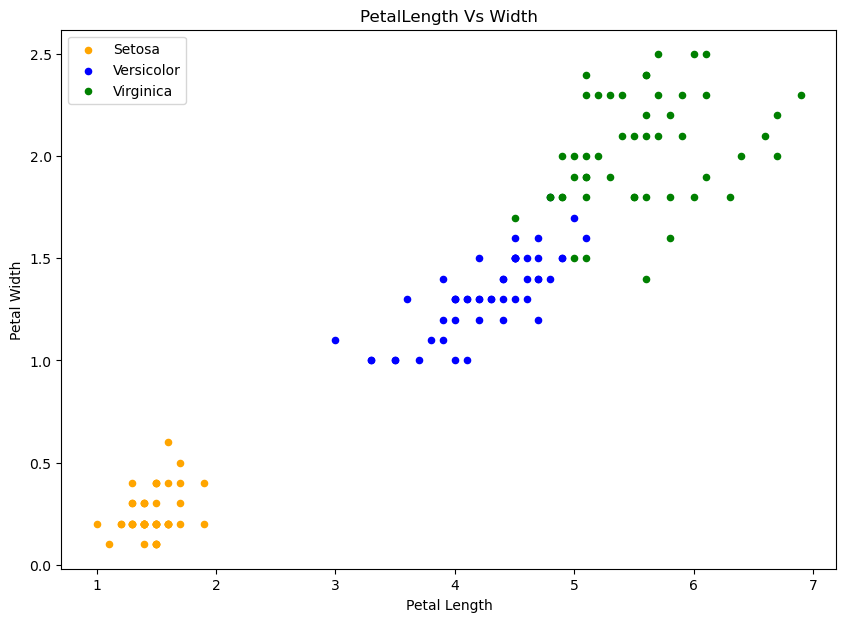

In [9]:
fig=iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange',label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label='Versicolor',ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label='Virginica',ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('PetalLength Vs Width')

fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()


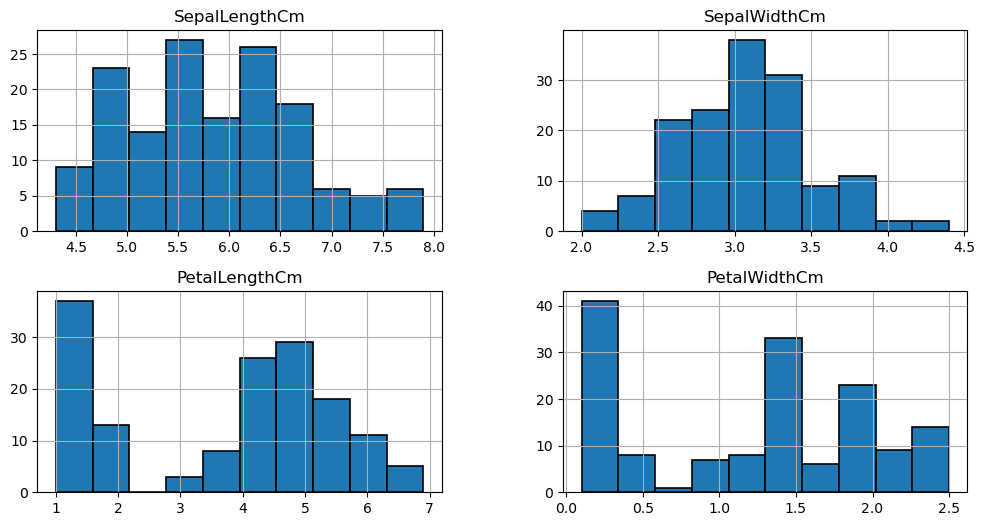

In [10]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

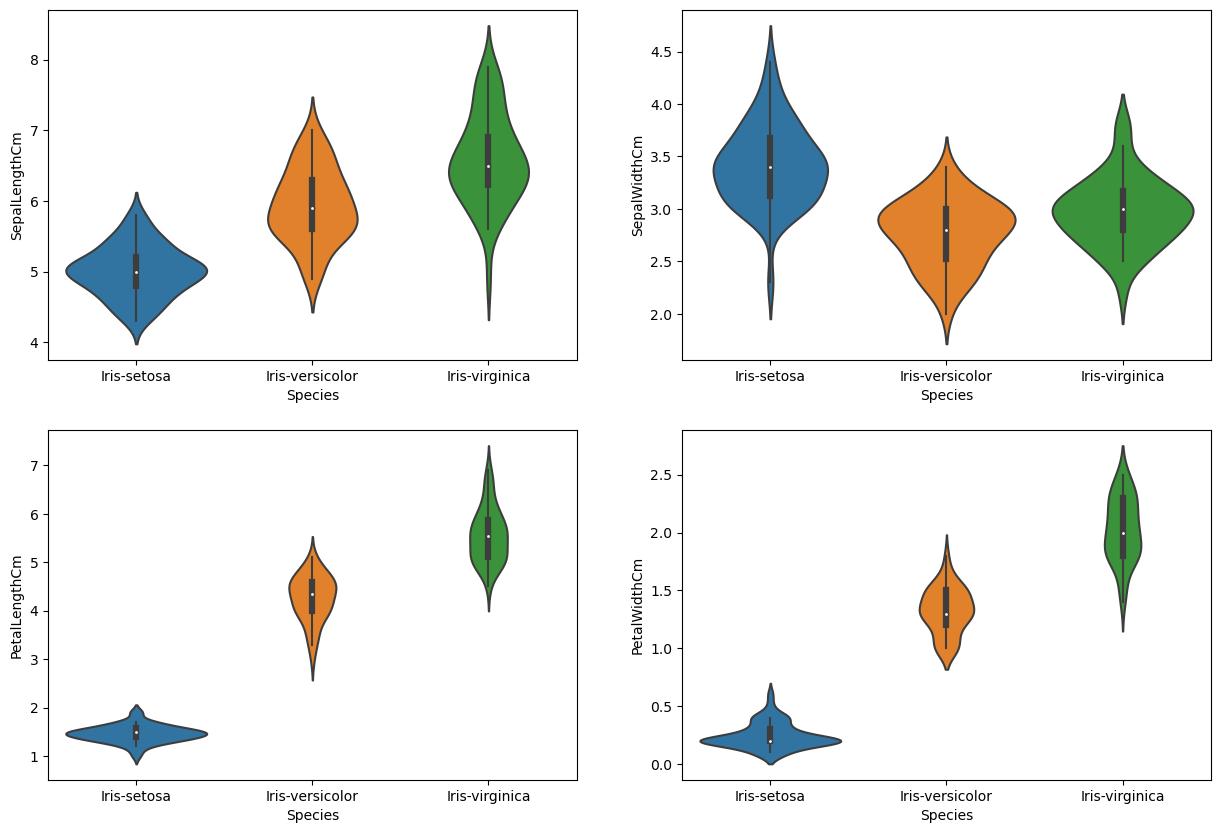

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

In [13]:
iris.shape

(150, 5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5860\2918280402.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')


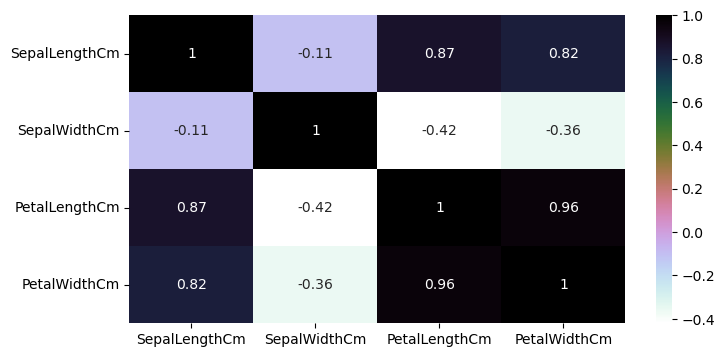

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [15]:
train,test=train_test_split(iris,test_size=0.4)
print(train.shape)
print(test.shape)

(90, 5)
(60, 5)


In [16]:
train_X=train[['SepalLengthCm','SepalLengthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

test_X=test[['SepalLengthCm','SepalLengthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

In [17]:
train_X.head()

,SepalLengthCm,SepalLengthCm,PetalLengthCm,PetalWidthCm
145,6.7,6.7,5.2,2.3
127,6.1,6.1,4.9,1.8
2,4.7,4.7,1.3,0.2
22,4.6,4.6,1.0,0.2
105,7.6,7.6,6.6,2.1


In [18]:
model=LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is:',metrics.accuracy_score(prediction,test_y))

The accuracy of Logistic Regression is: 0.95


In [19]:
X=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifier=LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


In [22]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.85      0.96      0.90        23
 Iris-virginica       0.94      0.81      0.87        21

       accuracy                           0.92        60
      macro avg       0.93      0.92      0.92        60
   weighted avg       0.92      0.92      0.92        60

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]


In [23]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9166666666666666


In [24]:
from sklearn.metrics import classification_report

classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))   

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.96      0.94        23
 Iris-virginica       0.95      0.90      0.93        21

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60

[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]
accuracy is 0.95


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

classifier=SVC()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))   

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.96      0.92        23
 Iris-virginica       0.95      0.86      0.90        21

       accuracy                           0.93        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.94      0.93      0.93        60

[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]
accuracy is 0.9333333333333333


In [26]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))   

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.96      0.92        23
 Iris-virginica       0.95      0.86      0.90        21

       accuracy                           0.93        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.94      0.93      0.93        60

[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]
accuracy is 0.9333333333333333


C:\Users\Admin\AppData\Local\Temp\ipykernel_5860\946985695.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
C:\Users\Admin\AppData\Local\Temp\ipykernel_5860\946985695.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5860\946985695.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5860\946985695.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score))
C:\Users\Admin\AppData\Local\Temp\ipykern

([<matplotlib.axis.XTick at 0x1b521748f50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

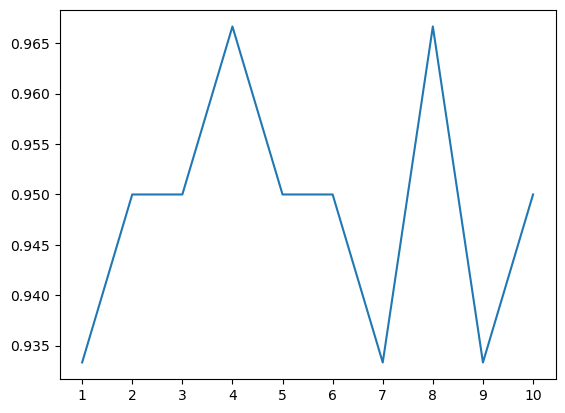

In [27]:
a_index=range(1,11)
a=pd.Series()
for i in a_index:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    accuracy_score=metrics.accuracy_score(prediction,test_y)
    a=a.append(pd.Series(accuracy_score))
plt.plot(a_index,a)
plt.xticks(a_index)

In [28]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]


In [29]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species



In [ ]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species
